# K means algorithms

In [5]:
#importing the necessary packages
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
#load the dataset
df= pd.read_csv('Mall_Customers.csv')

In [7]:
df.shape  #find number of rows and columns in the dataset

(200, 5)

In [8]:
X=df[['Annual Income (k$)','Spending Score (1-100)','Age']].values
print(X)


[[ 15  39  19]
 [ 15  81  21]
 [ 16   6  20]
 [ 16  77  23]
 [ 17  40  31]
 [ 17  76  22]
 [ 18   6  35]
 [ 18  94  23]
 [ 19   3  64]
 [ 19  72  30]
 [ 19  14  67]
 [ 19  99  35]
 [ 20  15  58]
 [ 20  77  24]
 [ 20  13  37]
 [ 20  79  22]
 [ 21  35  35]
 [ 21  66  20]
 [ 23  29  52]
 [ 23  98  35]
 [ 24  35  35]
 [ 24  73  25]
 [ 25   5  46]
 [ 25  73  31]
 [ 28  14  54]
 [ 28  82  29]
 [ 28  32  45]
 [ 28  61  35]
 [ 29  31  40]
 [ 29  87  23]
 [ 30   4  60]
 [ 30  73  21]
 [ 33   4  53]
 [ 33  92  18]
 [ 33  14  49]
 [ 33  81  21]
 [ 34  17  42]
 [ 34  73  30]
 [ 37  26  36]
 [ 37  75  20]
 [ 38  35  65]
 [ 38  92  24]
 [ 39  36  48]
 [ 39  61  31]
 [ 39  28  49]
 [ 39  65  24]
 [ 40  55  50]
 [ 40  47  27]
 [ 40  42  29]
 [ 40  42  31]
 [ 42  52  49]
 [ 42  60  33]
 [ 43  54  31]
 [ 43  60  59]
 [ 43  45  50]
 [ 43  41  47]
 [ 44  50  51]
 [ 44  46  69]
 [ 46  51  27]
 [ 46  46  53]
 [ 46  56  70]
 [ 46  55  19]
 [ 47  52  67]
 [ 47  59  54]
 [ 48  51  63]
 [ 48  59  18]
 [ 48  50 

In [9]:
#SELECT CLUSTER SIZE AS 5 ; Default is 8 
model=KMeans(n_clusters=5,random_state=42)

In [10]:
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [12]:
y=model.predict(X)

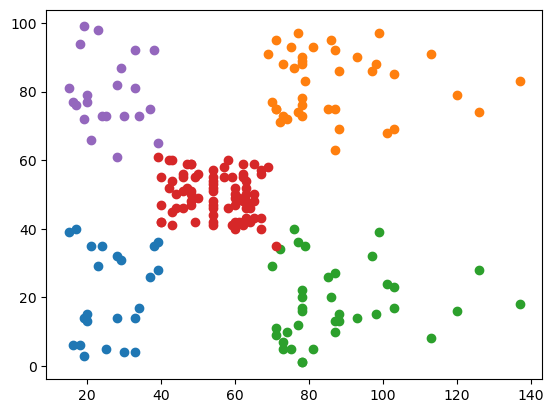

In [13]:
#show clusters combine
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])

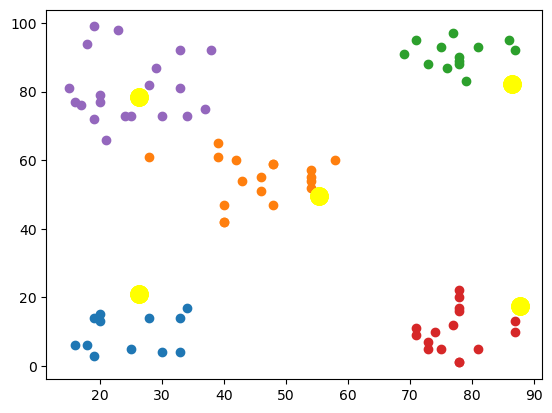

In [37]:
#show clusters combine ; s is used for size ;s=150
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,color='yellow')

In [19]:
model.cluster_centers_.shape   #K-means created 5 clusters with 3 features.

(5, 3)

In [20]:
#show cluster centers or centroid for Annual Income (k$) and Spending Score (1-100),Age

model.cluster_centers_

array([[26.30434783, 20.91304348, 45.2173913 ],
       [86.53846154, 82.12820513, 32.69230769],
       [55.29113924, 49.56962025, 43.08860759],
       [87.75      , 17.58333333, 40.66666667],
       [26.30434783, 78.56521739, 25.52173913]])

In [31]:
#Calculate Silhoutte Score
from sklearn.metrics import silhouette_score 
score = silhouette_score(X, y, metric='euclidean')
# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.444


2Cluster,Score0.293166070535953
3Cluster,Score0.3839349967742105
4Cluster,Score0.40546302077733304
5Cluster,Score0.44428597560893024
6Cluster,Score0.4523443947724053
7Cluster,Score0.4412807576186172
8Cluster,Score0.4280971079746162
9Cluster,Score0.40126260157691634
10Cluster,Score0.3790978814868016
11Cluster,Score0.3773045245801495
12Cluster,Score0.3533695974548904
13Cluster,Score0.34649030639881756
14Cluster,Score0.3485798986558785


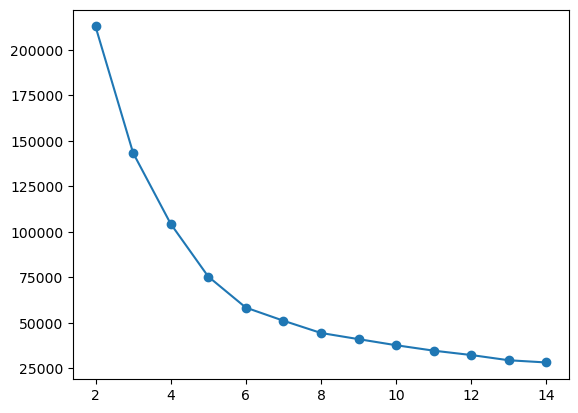

In [34]:
# show silhouette_score with cluster 
# from output we found that 5Cluster,Score is the maximum score 
# so we can finalize the cluster size =5 
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
    y=demo_model.predict(X)
    print(f"{i}Cluster,Score{silhouette_score(X,y)}")
plt.scatter(k,sse)
plt.plot(k,sse)

Introduction to Silhouette Score Concepts:

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as 
K-Means in terms of how well samples are clustered with other samples that are similar to each other

The Silhouette score is calculated for each sample of different clusters. 
In order to calculate the Silhouette score for each observation / data point, 
the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. 
This distance can also be called as mean intra-cluster distance. The mean distance is denoted by a

Mean distance between the observation and all other data points of the next nearest cluster. 
This distance can also be called as mean nearest-cluster distance. The mean distance is denoted by b

Silhouette score, S, for each sample is calculated using the following formula:
    
    S= (b-a)/max(a,b)

 
Note:
    
    The value of Silhouette score varies from -1 to 1. 
    
    If the score is 1, the cluster is dense and well-separated than other clusters. 
    
    A value near 0 represents overlapping clusters with samples very close to the decision boundary of the 
    neighbouring clusters. 
    
    A negative score (-1) indicate that the samples might have got assigned to the wrong clusters.
    
    

What is Elbow Method?
Elbow method is one of the most popular method used to select the optimal number of clusters by fitting the model with a range of values for K in K-means algorithm. Elbow method requires drawing a line plot between SSE (Sum of Squared errors) vs number of clusters and finding the point representing the “elbow point” (the point after which the SSE or inertia starts decreasing in a linear fashion)

Advantages:
The following are some advantages of K-Means clustering algorithms −

It is very easy to understand and implement.
If we have large number of variables then, K-means would be faster than Hierarchical clustering.
On re-computation of centroids, an instance can change the cluster.
Tighter clusters are formed with K-means as compared to Hierarchical clustering.



Disadvantages:
The following are some disadvantages of K-Means clustering algorithms −

It is a bit difficult to predict the number of clusters i.e. the value of k.
Output is strongly impacted by initial inputs like number of clusters (value of k).
Order of data will have strong impact on the final output.
It is very sensitive to rescaling. If we will rescale our data by means of normalization or standardization, then the output will completely change.final output.
It is not good in doing clustering job if the clusters have a complicated geometric shape.

In [ ]:
Applications of K-Means Clustering Algorithm:
    
Market segmentation
Document Clustering
Image segmentation
Image compression
Customer segmentation
Analyzing the trend on dynamic data